c:\Users\HCI_Lab_PC_3\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.3372 - loss: 1.7967 - val_accuracy: 0.5918 - val_loss: 1.1449
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.5731 - loss: 1.1868 - val_accuracy: 0.6984 - val_loss: 0.8689
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.6576 - loss: 0.9696 - val_accuracy: 0.7260 - val_loss: 0.7960
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.7032 - loss: 0.8425 - val_accuracy: 0.7344 - val_loss: 0.7602
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7287 - loss: 0.7709 - val_accuracy: 0.7662 - val_loss: 0.6750
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 30s 43ms/step - accuracy: 0.7543 - loss: 0.6981 - val_accuracy: 0.7668 - val_loss: 0.6625
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.7726 - loss: 0.6405 - val_accuracy: 0.7758 - val_loss: 0.6524
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 31s 44ms/step - accuracy: 0.7848 - loss: 0.6049 - 

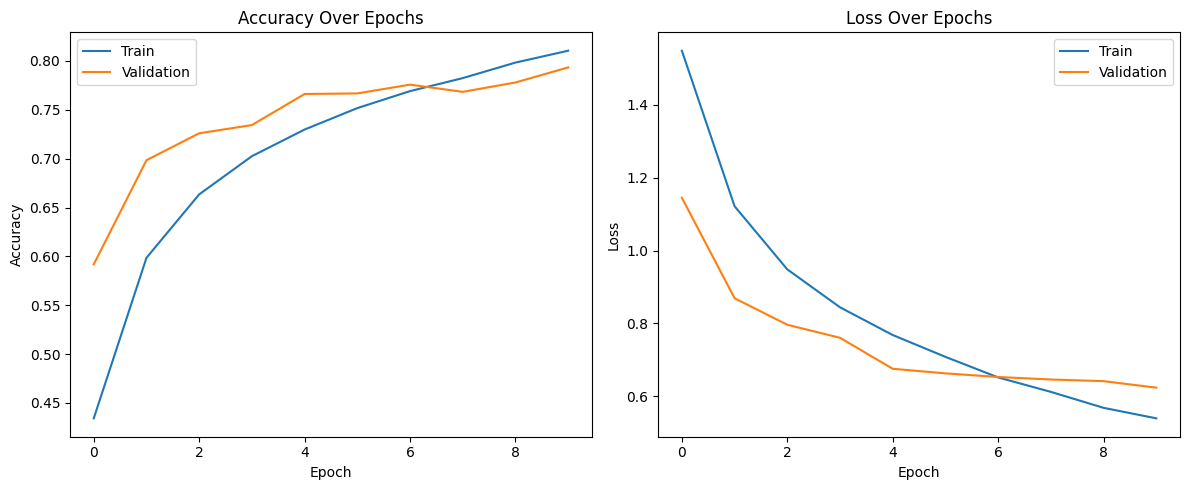

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.7863    0.8390    0.8118      1000
           1     0.8635    0.9170    0.8894      1000
           2     0.7215    0.6710    0.6953      1000
           3     0.6328    0.5550    0.5914      1000
           4     0.7367    0.7330    0.7348      1000
           5     0.7182    0.6730    0.6949      1000
           6     0.7901    0.8770    0.8313      1000
           7     0.8161    0.8300    0.8230      1000
           8     0.8521    0.8930    0.8721      1000
           9     0.8809    0.8430    0.8615      1000

    accuracy                         0.7831     10000
   macro avg     0.7798    0.7831    0.7806     10000
weighted avg     0.7798    0.7831    0.7806     10000



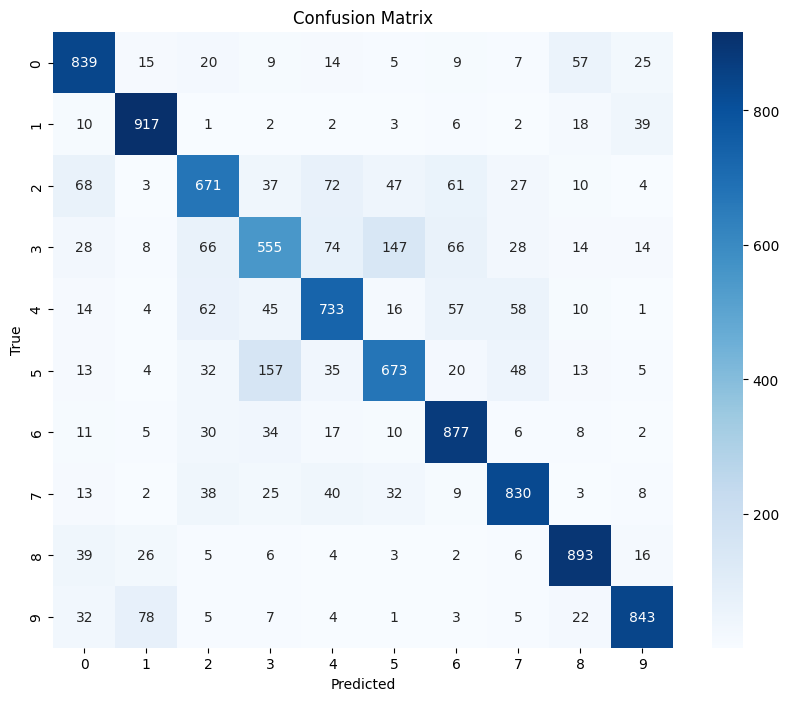

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#Load and Normalize CIFAR-10 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test  = y_test.flatten()

# Define CNN Model
def build_cnn_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

model = build_cnn_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the Model 
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Plot Accuracy and Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title("Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

#Classification Report and Confusion Matrix 
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, digits=4))

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
